In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import pickle

In [3]:
ddi_mapping = pd.read_pickle('../../Data/New/Interactions/Drugs/ddi_mapping_grp.pickle')
data = ddi_mapping
data.drop(['SUBJECT_IDS'], axis=1, inplace=True)
columns = ['NO_OF_SUBJECTS', 'GRP_1', 'GRP_2', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7']

In [4]:
x = data.drop(['OPIOIDS', 'OTHER_DRUGS'], axis=1)
x = x.values
#x.fillna(0, inplace=True)
#print(x.isnull().sum())
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_normalized = pd.DataFrame(x_scaled)
data_normalized.columns=columns
#data_normalized.drop(["SUBJECT_ID","AGE_GROUP"], axis=1, inplace=True)
#subject_details_normalized["AGE_GROUP"] = subject_details["AGE_GROUP"].values
#subject_details_normalized["SUBJECT_ID"] = subject_details["SUBJECT_ID"].values
data_normalized.head()
data_normalized['OPIOIDS'] = data['OPIOIDS']
data_normalized['OTHER_DRUGS'] = data['OTHER_DRUGS']
data_normalized.head()

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,NO_OF_SUBJECTS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7,OPIOIDS,OTHER_DRUGS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oxymorphone,neo*po*prednisolone syrup
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oxymorphone,levetiracetam oral solution
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oxymorphone,d12w
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oxymorphone,remifentanil
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oxymorphone,ceftriaxone


In [5]:
opioids = ['OXYMORPHONE', 'OXYCODONE', 'MORPHINE', 'MEPERIDINE','HYDROMORPHONE', 'HYDROCODONE', 'FENTANYL', 
           'CODEINE', 'BUPRENORPHINE','METHADONE', 'NALOXONE']
opioids = [x.lower() for x in opioids]
opioids

['oxymorphone',
 'oxycodone',
 'morphine',
 'meperidine',
 'hydromorphone',
 'hydrocodone',
 'fentanyl',
 'codeine',
 'buprenorphine',
 'methadone',
 'naloxone']

In [6]:
opioid_subject_drugs_freq_dict_ord = pd.read_pickle('../../Data/Opioids/Interactions/Drugs/opioid_subject_drugs_freq_dict_ord.pickle')

In [7]:
opioid_subject_other_drugs = dict()
for drug in opioid_subject_drugs_freq_dict_ord.keys():
    if ((drug.contains('oxymorphone') or drug.contains('oxycodone') or drug.contains('morphine') or
        drug.contains('meperidine') or drug.contains('hydromorphone') or drug.contains('hydrocodone') or
        drug.contains('fentanyl') or drug.contains('codeine') or drug.contains('buprenorphine') or 
        drug.contains('naloxone') or drug.contains('methadone'))):
        print(drug)

AttributeError: 'str' object has no attribute 'contains'

In [8]:
opioid_subject_other_drugs_feq = dict()
opioid_subject_opioids_freq = dict()
for drug in opioid_subject_drugs_freq_dict_ord.keys():
    if (('oxymorphone' not in drug and 'oxycodone' not in drug and 'morphine' not in drug and
        'meperidine' not in drug and 'hydromorphone' not in drug and 'hydrocodone' not in drug and
        'fentanyl' not in drug and 'codeine' not in drug and 'buprenorphine' not in drug and
        'naloxone' not in drug and 'methadone' not in drug)):
        opioid_subject_other_drugs[drug] = opioid_subject_drugs_freq_dict_ord[drug]
    else:
        opioid_subject_opioids_freq[drug] = opioid_subject_drugs_freq_dict_ord[drug]

In [9]:
len(opioid_subject_other_drugs)

3710

In [10]:
other_drugs_indices = enumerate(opioid_subject_other_drugs.keys(), 12)
other_drugs_dict = dict()
for index, drug in other_drugs_indices:
    other_drugs_dict[drug] = index
    print(index, drug)

opioids_indices = enumerate(opioids, 1)
opioid_dict = dict()
for index, opioid in opioids_indices:
    opioid_dict[opioid] = index
    print(index, opioid)

12 potassium chloride
13 d5w
14 insulin
15 furosemide
16 ns
17 0.9% sodium chloride
18 magnesium sulfate
19 iso-osmotic dextrose
20 sodium chloride 0.9%  flush
21 acetaminophen
22 5% dextrose
23 metoprolol
24 sw
25 metoprolol tartrate
26 lorazepam
27 calcium gluconate
28 heparin
29 docusate sodium
30 vancomycin
31 bisacodyl
32 warfarin
33 heparin sodium
34 lr
35 propofol
36 pantoprazole
37 senna
38 aspirin
39 bag
40 vial
41 vancomycin hcl
42 dextrose 50%
43 albuterol 0.083% neb soln
44 ondansetron
45 ranitidine
46 haloperidol
47 levofloxacin
48 aspirin ec
49 sodium bicarbonate
50 prednisone
51 ipratropium bromide neb
52 famotidine
53 potassium phosphate
54 nitroglycerin
55 pantoprazole sodium
56 lisinopril
57 metoclopramide
58 neutra-phos
59 atorvastatin
60 amiodarone
61 hydralazine
62 diltiazem
63 docusate sodium (liquid)
64 d5 1/2ns
65 phenylephrine
66 sterile water
67 midazolam
68 0.9% sodium chloride (mini bag plus)
69 syringe
70 cefazolin
71 amiodarone hcl
72 milk of magnesia
73 t

723 olanzapine (disintergrating tablet)
724 butalbital-acet-caffeine
725 vitamin e
726 beclomethasone dipro. aq (nasal)
727 clonidine tts 3 patch
728 neo*im*pneumococcal 7-valent
729 salmeterol
730 felodipine
731 nitrofurantoin (macrodantin)
732 neo*im*haemophilus b  conj vac
733 colistin
734 clobetasol propionate 0.05% cream
735 mesna
736 ns syringe (intrapleural)
737 d15w
738 lyrica
739 *nf* basiliximab
740 heparin flush port (10 units/ml)
741 fluphenazine
742 ropinirole hcl
743 norepinephrine bitartrate
744 bicitra
745 flecainide acetate
746 doxorubicin
747 beclomethasone dipropionate
748 desmopressin nasal
749 drotrecogin alfa (xigris)
750 d12.5w
751 hydrocortisone (rectal) 2.5% cream
752 avapro
753 perphenazine
754 multivitamin-12
755 bismuth subsalicylate
756 meningococcal conj vaccine (menactra)
757 vitamin b complex w/c
758 tirofiban
759 sterile diluent for flolan
760 tocopheryl
761 epoprostenol na
762 bacitracin/polymyxin b sulfate opht. oint
763 *nf* ertapenem sodium
764 cycl

1223 methylene blue
1224 rivastigmine
1225 pancrease mt 16
1226 lopinavir-ritonavir (oral soln)
1227 0.9% sodium chloride (excel bag)
1228 calcium carbonate (tums)
1229 levobunolol hcl 0.5%
1230 hydrocortisone oint 1%
1231 tetracycline hcl
1232 loxapine succinate
1233 doripenem *nf*
1234 atacand
1235 ranexa
1236 travatan z
1237 gentamicin sulf. ophth. soln
1238 naphazoline-pheniramine ophth. solution
1239 sodium bica
1240 paclitaxel
1241 vancomycin 25mg/ml ophth soln
1242 dextroamphetamine
1243 vancomycin intrathecal
1244 bactrim desensitization
1245 fenofibrate micronized
1246 copaxone
1247 critic-aid skin paste
1248 basiliximab
1249 theophylline er (uniphyl)
1250 ketoconazole
1251 welchol
1252 cromolyn sodium
1253 levemir
1254 piroxicam
1255 pancuronium bromide (nicu)
1256 symbicort
1257 levalbuterol tartrate
1258 nalbuphine hcl
1259 zelnorm
1260 tretinoin suspension
1261 carisoprodol
1262 bimatoprost
1263 vi-daylin multivitamin drops
1264 travoprost
1265 cipro
1266 dexamethason
1267

1972 aminocaproic 
1973 proplex t
1974 humulin 70/30
1975 zanamivir
1976 docusate sod
1977 camphor-menthol
1978 doxycycline hyclate (bulk)
1979 pulmicort flexhaler
1980 triamcinolone acetonide
1981 triethanolamine solution
1982 dexrazoxane
1983 betaxolol
1984 truvada
1985 azacitidine (subcut)
1986 acetami
1987 etravirine 100mg tablet
1988 trisodium citrate 4% replacement soln
1989 ipratropium 
1990 <ind> drotrecogin alfa study drug
1991 neoral study med (*ind*)
1992 fluticasone
1993 stalevo 150
1994 clofarabine  *ind*
1995 zetia
1996 percocet
1997 prozac
1998 emtriva
1999 provera
2000 carteolol 1% ophth soln
2001 timolol
2002 papaverine hcl
2003 ropinirole hydrochloride
2004 ergocalciferol
2005 renagel
2006 lindane lotion
2007 b-50
2008 terconazole 80mg vag. supp
2009 neo*po*midazolam
2010 fluphenazine decanoate
2011 valganciclo
2012 sulfacetamide-prednisolone ophth. susp.
2013 budesonide (nasal)
2014 docusate s
2015 belatacept study drug (*ind*)
2016 tisseel vs. fs vh sd
2017 procarba

2722 lipitor
2723 novolin r
2724 mometasone furoate (nasonex)
2725 isosorbide monon
2726 sulfameth/trimethopr
2727 tuck
2728 neo*po*gentian violet 0.25 %
2729 tylenol pm extra strength
2730 alka-seltzer
2731 sarna
2732 microgestin 1/20 (21)
2733 lidocaine topical
2734 phenylephrine  0.05% nasal spray
2735 *nf*
2736 amiodarone oral suspension
2737 benazepril-hydrochlorothiazide
2738 chloroprocaine 3% mpf
2739 hydrocortisone/iodoquinol
2740 fentora
2741 ocuvite lutein
2742 plan b(levonorgestrel)
2743 reyataz
2744 abiraterone (zytiga)
2745 fluocinolone 0.01% cream
2746 azelastine hcl
2747 niacin flush free
2748 salivart
2749 albuterol inhaler (proair)
2750 pramoxine-mineral oil-zinc
2751 iron
2752 tobramycin fortified ophth. 15mg/ml
2753 pramoxine hcl
2754 isosorbide mononitrate 
2755 nuvaring(etonogestrel/ethinyl estradiol
2756 ethanol 70% catheter lock
2757 lantus solostar
2758 dakins 1/8 strength
2759 abreva
2760 acidophilus-b.bifidum-b.longum
2761 phyton
2762 ziprasidone hcl
2763 albu

3472 sulfameth/trimeth
3473 os-cal 500 + d
3474 haloperidol  
3475 phenytoin chewtabs
3476 mvi
3477 imd
3478 traz
3479 hydroxychloroquine
3480 molindone
3481 calcium 500+d
3482 plasmanate
3483 budesonide (pulmicort)
3484 pimozide
3485 taztia xt
3486 risedronate (actonel)
3487 belladonna alkaloids-opium
3488 varicella-zoster imm globulin
3489 fosamax
3490 valganc
3491 triamcinolone diacetate
3492 maa
3493 granulex
3494 aleve
3495 hyoscy
3496 cyclosporine modified (eon labs)
3497 anamorelin hcl vs placebo
3498 cepacol
3499 magnesium sulfate 
3500 *nf* pediatric vitamins adc
3501 micronefrin
3502 losartan
3503 advair hfa
3504 bevacizumab (avastin)
3505 mesalamine 
3506 slow fe
3507 didanos
3508 prochlorperazine edisylate
3509 metamucil smooth texture
3510 zz
3511 pilocarpine
3512 lidocaine 1% p
3513 ampicil
3514 emla
3515 genta
3516 varicella virus
3517 nap
3518 cromol
3519 vexol (rimexolone)
3520 arginine (l-arginine)
3521 zantac 75
3522 preparation h maximum strength
3523 nystatin oral 

In [11]:
for index, row in data_normalized.iterrows():
    row['OPIOIDS'] = opioid_dict[row['OPIOIDS']]
    row['OTHER_DRUGS'] = other_drugs_dict[row['OTHER_DRUGS']]
    data_normalized.iloc[index] = row
    if (index%100 == 0):
        print("Rows iterated: %i" %index)
data_normalized.head()

Rows iterated: 0
Rows iterated: 100
Rows iterated: 200
Rows iterated: 300
Rows iterated: 400
Rows iterated: 500
Rows iterated: 600
Rows iterated: 700
Rows iterated: 800
Rows iterated: 900
Rows iterated: 1000
Rows iterated: 1100
Rows iterated: 1200
Rows iterated: 1300
Rows iterated: 1400
Rows iterated: 1500
Rows iterated: 1600
Rows iterated: 1700
Rows iterated: 1800
Rows iterated: 1900
Rows iterated: 2000
Rows iterated: 2100
Rows iterated: 2200
Rows iterated: 2300
Rows iterated: 2400
Rows iterated: 2500
Rows iterated: 2600
Rows iterated: 2700
Rows iterated: 2800
Rows iterated: 2900
Rows iterated: 3000
Rows iterated: 3100
Rows iterated: 3200
Rows iterated: 3300
Rows iterated: 3400
Rows iterated: 3500
Rows iterated: 3600
Rows iterated: 3700
Rows iterated: 3800
Rows iterated: 3900
Rows iterated: 4000
Rows iterated: 4100
Rows iterated: 4200
Rows iterated: 4300
Rows iterated: 4400
Rows iterated: 4500
Rows iterated: 4600
Rows iterated: 4700
Rows iterated: 4800
Rows iterated: 4900
Rows iterate

KeyboardInterrupt: 

In [11]:
data.columns

Index(['OPIOIDS', 'OTHER_DRUGS', 'NO_OF_SUBJECTS', 'GRP_1', 'GRP_2', 'GRP_3',
       'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7'],
      dtype='object')

In [12]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_normalized)
labels = kmeans.labels_

#Glue back to originaal data
data['CLUSTERS'] = labels
data_normalized['CLUSTERS'] = labels
#Add the column into our list
all_columns = ['OPIOIDS', 'OTHER_DRUGS', 'NO_OF_SUBJECTS', 'GRP_1', 'GRP_2', 'GRP_3',
       'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7', 'CLUSTERS']
all_columns.extend(['CLUSTERS'])


In [13]:
set(data['CLUSTERS'])

{0, 1, 2, 3}

Text(0.5,21.7063,'Other Drugs')

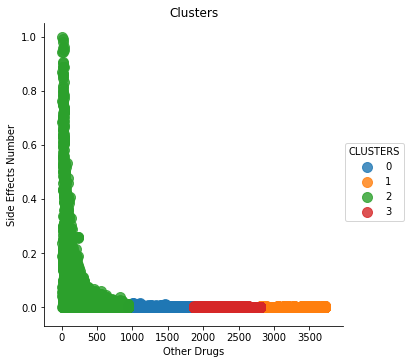

In [14]:
data_2 = data_normalized[data_normalized['CLUSTERS']==2]
sns.lmplot('OTHER_DRUGS', 'GRP_1',
           data=data_normalized, 
           fit_reg=False, 
           hue="CLUSTERS",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters')
plt.ylabel('Side Effects Number')
plt.xlabel('Other Drugs')

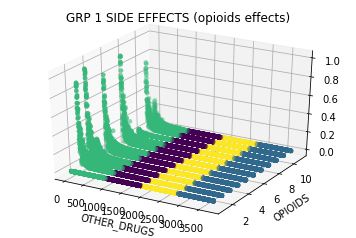

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
                data_normalized['GRP_1'], c=data_normalized['CLUSTERS'], linewidth=0.2, label=data_normalized['CLUSTERS'])
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 1 SIDE EFFECTS (opioids effects)')
#plt.legend()
plt.gca()

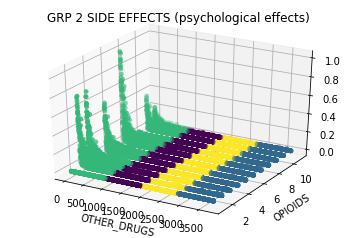

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
                data_normalized['GRP_2'], c=data_normalized['CLUSTERS'], linewidth=0.2)
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 2 SIDE EFFECTS (psychological effects)')
plt.gca()


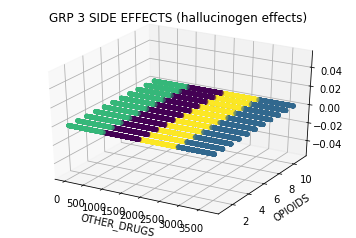

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
                data_normalized['GRP_3'], c=data_normalized['CLUSTERS'], linewidth=0.2)
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 3 SIDE EFFECTS (hallucinogen effects)')
plt.gca()


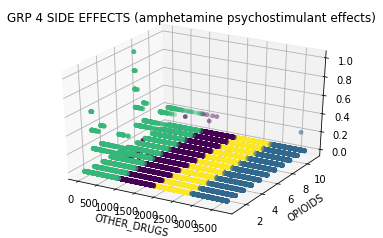

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
                data_normalized['GRP_4'], c=data_normalized['CLUSTERS'], linewidth=0.2)
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 4 SIDE EFFECTS (amphetamine psychostimulant effects)')
plt.gca()

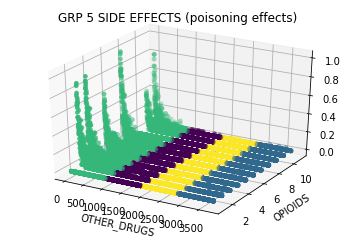

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
                data_normalized['GRP_5'], c=data_normalized['CLUSTERS'], linewidth=0.2)
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 5 SIDE EFFECTS (poisoning effects)')
plt.gca()

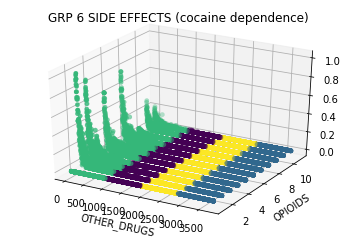

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
                data_normalized['GRP_6'], c=data_normalized['CLUSTERS'], linewidth=0.2)
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 6 SIDE EFFECTS (cocaine dependence)')
plt.gca()

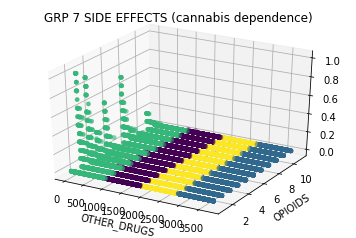

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
                data_normalized['GRP_7'], c=data_normalized['CLUSTERS'], linewidth=0.2)
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 7 SIDE EFFECTS (cannabis dependence)')
plt.gca()

In [24]:
other_drugs_dict['insulin']

14

In [26]:
data_normalized[data_normalized['OTHER_DRUGS']==14]

,NO_OF_SUBJECTS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7,OPIOIDS,OTHER_DRUGS,CLUSTERS
1229,0.000055,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1,14,2
4939,0.792065,0.689231,0.581818,0.0,0.4,0.589744,0.750000,0.454545,2,14,2
8649,0.914606,0.809231,0.618182,0.0,0.2,0.666667,0.711538,0.454545,3,14,2
12359,0.257831,0.166154,0.072727,0.0,0.0,0.102564,0.153846,0.272727,4,14,2
16069,0.492692,0.695385,0.490909,0.0,0.0,0.435897,0.557692,0.363636,5,14,2
19779,0.059677,0.049231,0.018182,0.0,0.0,0.102564,0.076923,0.000000,6,14,2
23489,0.538246,0.747692,0.836364,0.0,0.2,0.743590,0.596154,0.181818,7,14,2
27199,0.065227,0.061538,0.072727,0.0,0.2,0.076923,0.096154,0.090909,8,14,2
30909,0.000604,0.027692,0.000000,0.0,0.0,0.000000,0.038462,0.000000,9,14,2
34619,0.030828,0.547692,0.272727,0.0,0.0,0.256410,0.230769,0.090909,10,14,2


In [27]:
data_normalized[data_normalized['CLUSTERS']==2]

,NO_OF_SUBJECTS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7,OPIOIDS,OTHER_DRUGS,CLUSTERS
1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1,612,2
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1,110,2
18,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1,922,2
19,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1,360,2
22,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1,768,2
23,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1,333,2
24,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1,241,2
31,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1,887,2
45,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1,254,2
46,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1,495,2


In [28]:
data_normalized.to_pickle('../../Data/New/Clustering/data_normalized.pickle')
data.to_pickle('../../Data/New/Clustering/data.pickle')
with open('../../Data/New/Clustering/other_drugs_dict.pickle', 'wb') as pickler:
    pickle.dump(other_drugs_dict, pickler, protocol=pickle.HIGHEST_PROTOCOL)
with open('../../Data/New/Clustering/opioid_dict.pickle', 'wb') as pickler:
    pickle.dump(opioid_dict, pickler, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
with open('../../Data/New/Clustering/other_drugs_dict.pickle', 'rb') as pickler:
    other_drugs_dict = pickle.load(pickler)
other_drugs

KeyError: 3722

In [35]:
interesting = data_normalized[data_normalized['CLUSTERS']==2]
interesting[interesting['GRP_1']>0.9]

,NO_OF_SUBJECTS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7,OPIOIDS,OTHER_DRUGS,CLUSTERS
6511,0.855039,0.901538,0.709091,0.0,0.6,0.871795,0.942308,1.000000,2,20,2
7738,0.787229,0.904615,0.636364,0.0,0.2,0.871795,0.788462,0.727273,3,19,2
8573,1.000000,0.978462,0.636364,0.0,0.2,0.820513,0.865385,0.818182,3,21,2
9500,0.989010,1.000000,0.709091,0.0,0.4,0.794872,0.730769,0.909091,3,12,2
9792,0.768931,0.963077,0.763636,0.0,0.2,0.923077,0.884615,0.909091,3,28,2
10221,0.955654,0.990769,0.709091,0.0,0.4,0.871795,0.807692,0.909091,3,20,2
10910,0.949555,0.941538,0.636364,0.0,0.4,0.692308,0.750000,0.909091,3,18,2
24340,0.607979,0.941538,1.000000,0.0,0.8,0.769231,0.692308,0.727273,7,12,2
24632,0.551764,0.950769,0.981818,0.0,1.0,1.000000,0.788462,0.727273,7,28,2
25061,0.576437,0.956923,0.927273,0.0,1.0,0.974359,0.750000,0.727273,7,20,2


In [33]:
other_drugs_dict

{'potassium chloride': 12,
 'd5w': 13,
 'insulin': 14,
 'furosemide': 15,
 'ns': 16,
 '0.9% sodium chloride': 17,
 'magnesium sulfate': 18,
 'iso-osmotic dextrose': 19,
 'sodium chloride 0.9%  flush': 20,
 'acetaminophen': 21,
 '5% dextrose': 22,
 'metoprolol': 23,
 'sw': 24,
 'metoprolol tartrate': 25,
 'lorazepam': 26,
 'calcium gluconate': 27,
 'heparin': 28,
 'docusate sodium': 29,
 'vancomycin': 30,
 'bisacodyl': 31,
 'warfarin': 32,
 'heparin sodium': 33,
 'lr': 34,
 'propofol': 35,
 'pantoprazole': 36,
 'senna': 37,
 'aspirin': 38,
 'bag': 39,
 'vial': 40,
 'vancomycin hcl': 41,
 'dextrose 50%': 42,
 'albuterol 0.083% neb soln': 43,
 'ondansetron': 44,
 'ranitidine': 45,
 'haloperidol': 46,
 'levofloxacin': 47,
 'aspirin ec': 48,
 'sodium bicarbonate': 49,
 'prednisone': 50,
 'ipratropium bromide neb': 51,
 'famotidine': 52,
 'potassium phosphate': 53,
 'nitroglycerin': 54,
 'pantoprazole sodium': 55,
 'lisinopril': 56,
 'metoclopramide': 57,
 'neutra-phos': 58,
 'atorvastatin':

In [48]:
data_normalized[data_normalized['GRP_4'] > 0.6]

,NO_OF_SUBJECTS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7,OPIOIDS,OTHER_DRUGS,CLUSTERS
4000,0.814705,0.772308,0.472727,0.0,0.6,0.743590,0.865385,0.909091,2,29,2
5790,0.859820,0.870769,0.745455,0.0,0.6,0.769231,0.923077,1.000000,2,12,2
6082,0.665897,0.886154,0.763636,0.0,0.6,0.897436,1.000000,0.909091,2,28,2
6171,0.457138,0.446154,0.309091,0.0,0.6,0.410256,0.461538,0.272727,2,42,2
6255,0.513133,0.538462,0.472727,0.0,0.6,0.410256,0.519231,0.636364,2,35,2
6511,0.855039,0.901538,0.709091,0.0,0.6,0.871795,0.942308,1.000000,2,20,2
6622,0.503297,0.689231,0.563636,0.0,0.6,0.692308,0.750000,1.000000,2,37,2
6886,0.677272,0.615385,0.381818,0.0,0.6,0.538462,0.615385,0.818182,2,31,2
7200,0.841301,0.818462,0.672727,0.0,0.6,0.666667,0.884615,1.000000,2,18,2
22367,0.328443,0.630769,0.618182,0.0,0.6,0.512821,0.519231,0.454545,7,17,2


In [43]:
data_normalized[data_normalized['OTHER_DRUGS']==14]

,NO_OF_SUBJECTS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7,OPIOIDS,OTHER_DRUGS,CLUSTERS
1229,0.000055,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1,14,2
4939,0.792065,0.689231,0.581818,0.0,0.4,0.589744,0.750000,0.454545,2,14,2
8649,0.914606,0.809231,0.618182,0.0,0.2,0.666667,0.711538,0.454545,3,14,2
12359,0.257831,0.166154,0.072727,0.0,0.0,0.102564,0.153846,0.272727,4,14,2
16069,0.492692,0.695385,0.490909,0.0,0.0,0.435897,0.557692,0.363636,5,14,2
19779,0.059677,0.049231,0.018182,0.0,0.0,0.102564,0.076923,0.000000,6,14,2
23489,0.538246,0.747692,0.836364,0.0,0.2,0.743590,0.596154,0.181818,7,14,2
27199,0.065227,0.061538,0.072727,0.0,0.2,0.076923,0.096154,0.090909,8,14,2
30909,0.000604,0.027692,0.000000,0.0,0.0,0.000000,0.038462,0.000000,9,14,2
34619,0.030828,0.547692,0.272727,0.0,0.0,0.256410,0.230769,0.090909,10,14,2


In [44]:
opioid_dict

{'buprenorphine': 9,
 'codeine': 8,
 'fentanyl': 7,
 'hydrocodone': 6,
 'hydromorphone': 5,
 'meperidine': 4,
 'methadone': 10,
 'morphine': 3,
 'naloxone': 11,
 'oxycodone': 2,
 'oxymorphone': 1}

In [20]:
dum = ['buprenorphine',
 'codeine',
 'fentanyl',
 'hydrocodone',
 'hydromorphone',
 'meperidine',
 'methadone',
 'morphine',
 'naloxone',
 'oxycodone']
data_dum = data[data['OPIOIDS'].isin(dum)]
data_dum[data_dum['OTHER_DRUGS']=='insulin']

,OPIOIDS,OTHER_DRUGS,NO_OF_SUBJECTS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7
4939,oxycodone,insulin,14414,224,32,0,2,23,39,5
8649,morphine,insulin,16644,263,34,0,1,26,37,5
12359,meperidine,insulin,4692,54,4,0,0,4,8,3
16069,hydromorphone,insulin,8966,226,27,0,0,17,29,4
19779,hydrocodone,insulin,1086,16,1,0,0,4,4,0
23489,fentanyl,insulin,9795,243,46,0,1,29,31,2
27199,codeine,insulin,1187,20,4,0,1,3,5,1
30909,buprenorphine,insulin,11,9,0,0,0,0,2,0
34619,methadone,insulin,561,178,15,0,0,10,12,1
38329,naloxone,insulin,609,64,9,0,1,20,6,0


In [12]:
data_normalized = pd.read_pickle('../../Data/New/Clustering/data_normalized.pickle')

In [20]:
data_null = data_normalized.loc[(data_normalized['GRP_1'] == 0) & (data_normalized['GRP_2'] == 0) &
                               (data_normalized['GRP_3'] == 0) & (data_normalized['GRP_4'] == 0) &
                               (data_normalized['GRP_5'] == 0) & (data_normalized['GRP_6'] == 0) &
                               (data_normalized['GRP_7'] == 0)]

In [22]:
data_null

,NO_OF_SUBJECTS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7,OPIOIDS,OTHER_DRUGS,CLUSTERS
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3014,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,612,2
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2178,3
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3697,1
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,110,2
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2832,1
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1669,0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2845,1
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1234,0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3369,1


In [24]:
data_good = data_normalized.loc[(data_normalized['GRP_1'] != 0) | (data_normalized['GRP_2'] != 0) |
                               (data_normalized['GRP_3'] != 0) | (data_normalized['GRP_4'] != 0) |
                               (data_normalized['GRP_5'] != 0) | (data_normalized['GRP_6'] != 0) |
                               (data_normalized['GRP_7'] != 0)]
len(data_good)

7789

In [25]:
data_good

,NO_OF_SUBJECTS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7,OPIOIDS,OTHER_DRUGS,CLUSTERS
3711,0.004176,0.012308,0.000000,0.0,0.0,0.025641,0.000000,0.000000,2,612,2
3714,0.123750,0.276923,0.290909,0.0,0.2,0.307692,0.326923,0.090909,2,110,2
3716,0.000220,0.003077,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2,1669,0
3729,0.024838,0.043077,0.036364,0.0,0.2,0.025641,0.038462,0.000000,2,360,2
3732,0.003682,0.024615,0.000000,0.0,0.0,0.000000,0.019231,0.000000,2,768,2
3733,0.021816,0.036923,0.054545,0.0,0.2,0.076923,0.076923,0.000000,2,333,2
3734,0.026706,0.024615,0.000000,0.0,0.0,0.051282,0.038462,0.000000,2,241,2
3741,0.002198,0.003077,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2,887,2
3747,0.000495,0.003077,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2,1422,0
3752,0.000824,0.000000,0.018182,0.0,0.0,0.000000,0.019231,0.000000,2,1200,0


In [27]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_good)
labels = kmeans.labels_

#Glue back to originaal data
#data['CLUSTERS'] = labels
data_good['CLUSTERS'] = labels
#Add the column into our list
all_columns = ['OPIOIDS', 'OTHER_DRUGS', 'NO_OF_SUBJECTS', 'GRP_1', 'GRP_2', 'GRP_3',
       'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7', 'CLUSTERS']
all_columns.extend(['CLUSTERS'])


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


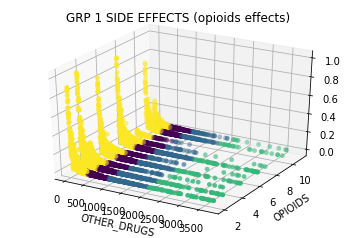

In [28]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_good['OTHER_DRUGS'], data_good['OPIOIDS'], 
                data_good['GRP_1'], c=data_good['CLUSTERS'], linewidth=0.2, label=data_good['CLUSTERS'])
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 1 SIDE EFFECTS (opioids effects)')
#plt.legend()
plt.gca()

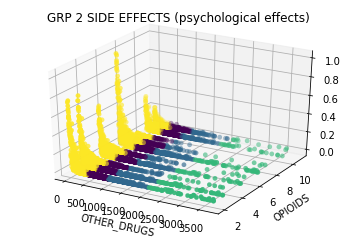

In [29]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_good['OTHER_DRUGS'], data_good['OPIOIDS'], 
                data_good['GRP_2'], c=data_good['CLUSTERS'], linewidth=0.2, label=data_good['CLUSTERS'])
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 2 SIDE EFFECTS (psychological effects)')
#plt.legend()
plt.gca()

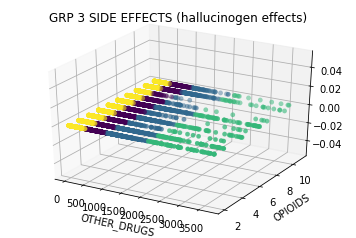

In [30]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_good['OTHER_DRUGS'], data_good['OPIOIDS'], 
                data_good['GRP_3'], c=data_good['CLUSTERS'], linewidth=0.2, label=data_good['CLUSTERS'])
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 3 SIDE EFFECTS (hallucinogen effects)')
#plt.legend()
plt.gca()

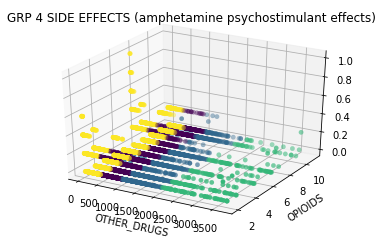

In [31]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_good['OTHER_DRUGS'], data_good['OPIOIDS'], 
                data_good['GRP_4'], c=data_good['CLUSTERS'], linewidth=0.2, label=data_good['CLUSTERS'])
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 4 SIDE EFFECTS (amphetamine psychostimulant effects)')
#plt.legend()
plt.gca()

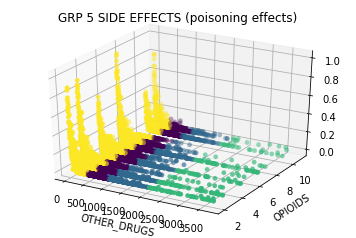

In [33]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_good['OTHER_DRUGS'], data_good['OPIOIDS'], 
                data_good['GRP_5'], c=data_good['CLUSTERS'], linewidth=0.2, label=data_good['CLUSTERS'])
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 5 SIDE EFFECTS (poisoning effects)')
#plt.legend()
plt.gca()

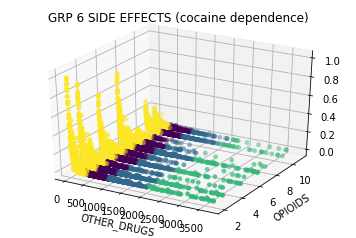

In [34]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_good['OTHER_DRUGS'], data_good['OPIOIDS'], 
                data_good['GRP_6'], c=data_good['CLUSTERS'], linewidth=0.2, label=data_good['CLUSTERS'])
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 6 SIDE EFFECTS (cocaine dependence)')
#plt.legend()
plt.gca()

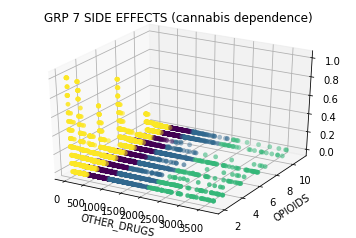

In [35]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_trisurf(data_normalized['OTHER_DRUGS'], data_normalized['OPIOIDS'], 
 #               data_normalized['GRP_1'], cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter3D(data_good['OTHER_DRUGS'], data_good['OPIOIDS'], 
                data_good['GRP_7'], c=data_good['CLUSTERS'], linewidth=0.2, label=data_good['CLUSTERS'])
plt.ylabel('OPIOIDS')
plt.xlabel('OTHER_DRUGS')
plt.title('GRP 7 SIDE EFFECTS (cannabis dependence)')
#plt.legend()
plt.gca()

In [36]:
data_good[data_good['OTHER_DRUGS'] == 14]

,NO_OF_SUBJECTS,GRP_1,GRP_2,GRP_3,GRP_4,GRP_5,GRP_6,GRP_7,OPIOIDS,OTHER_DRUGS,CLUSTERS
4939,0.792065,0.689231,0.581818,0.0,0.4,0.589744,0.750000,0.454545,2,14,3
8649,0.914606,0.809231,0.618182,0.0,0.2,0.666667,0.711538,0.454545,3,14,3
12359,0.257831,0.166154,0.072727,0.0,0.0,0.102564,0.153846,0.272727,4,14,3
16069,0.492692,0.695385,0.490909,0.0,0.0,0.435897,0.557692,0.363636,5,14,3
19779,0.059677,0.049231,0.018182,0.0,0.0,0.102564,0.076923,0.000000,6,14,3
23489,0.538246,0.747692,0.836364,0.0,0.2,0.743590,0.596154,0.181818,7,14,3
27199,0.065227,0.061538,0.072727,0.0,0.2,0.076923,0.096154,0.090909,8,14,3
30909,0.000604,0.027692,0.000000,0.0,0.0,0.000000,0.038462,0.000000,9,14,3
34619,0.030828,0.547692,0.272727,0.0,0.0,0.256410,0.230769,0.090909,10,14,3
38329,0.033465,0.196923,0.163636,0.0,0.2,0.512821,0.115385,0.000000,11,14,3
